##### Import & Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Set Visual Style (Matplotlib specific)
plt.style.use('ggplot') 
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
file_path = "cleaned_featured_data.csv"

# Check if file exists to avoid errors
if not os.path.exists(file_path):
    print(f"Error: {file_path} not found. Please check the file name.")
else:
    df = pd.read_csv(file_path)
    
    # Ensure numeric types
    df['Original Price'] = pd.to_numeric(df['Original Price'], errors='coerce')
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df['Is_5G'] = df['Is_5G'].astype(bool)
    
    print("Data Loaded Successfully!")
    display(df.head())

Data Loaded Successfully!


,Original Price,Rating,Model,Color,Storage,Brand,Is_5G
0,6799,4.1,POCO C71,Cool Blue,128 GB,POCO,False
1,5999,4.3,Ai+ Pulse,Blue,64 GB,Ai+,False
2,9749,4.4,realme P3 Lite,Midnight Lily,128 GB,realme,True
3,7199,4.2,Moto g06 power,Tapestry,64 GB,Moto,False
4,6999,4.2,MOTOROLA g05,Forest Green,64 GB,MOTOROLA,False


##### KPI Summary (The "Executive View")

In [3]:
# Calculations
total_phones = len(df)
percent_5g = df['Is_5G'].mean() * 100
avg_price = df['Original Price'].mean()
median_price = df['Original Price'].median()
avg_rating = df['Rating'].mean()

brand_prices = df.groupby('Brand')['Original Price'].mean()
cheapest_brand = brand_prices.idxmin()
expensive_brand = brand_prices.idxmax()
best_rated_brand = df.groupby('Brand')['Rating'].mean().idxmax()

# Create Summary DataFrame
kpi_summary = pd.DataFrame({
    "KPI": [
        "Total Phones", "% 5G Phones", "Average Price", "Median Price", 
        "Average Rating", "Cheapest Brand", "Most Expensive Brand", "Highest Rated Brand"
    ],
    "Value": [
        total_phones, f"{percent_5g:.1f}%", f"₹{avg_price:,.0f}", f"₹{median_price:,.0f}",
        f"{avg_rating:.2f}", cheapest_brand, expensive_brand, best_rated_brand
    ]
})
display(kpi_summary)

,KPI,Value
0,Total Phones,240
1,% 5G Phones,69.6%
2,Average Price,"₹19,324"
3,Median Price,"₹17,999"
4,Average Rating,4.34
5,Cheapest Brand,Ai+
6,Most Expensive Brand,Apple
7,Highest Rated Brand,Apple


##### Brand Analysis (Market Positioning)

Top 5 Brands by Price:


,Brand,Avg_Price,Avg_Rating,Phone_Count
1,Apple,66320,4.60,5
3,Google,42999,4.38,5
9,Nothing,28999,4.50,6
14,Samsung,28460,4.33,23
11,OnePlus,23315,4.44,8


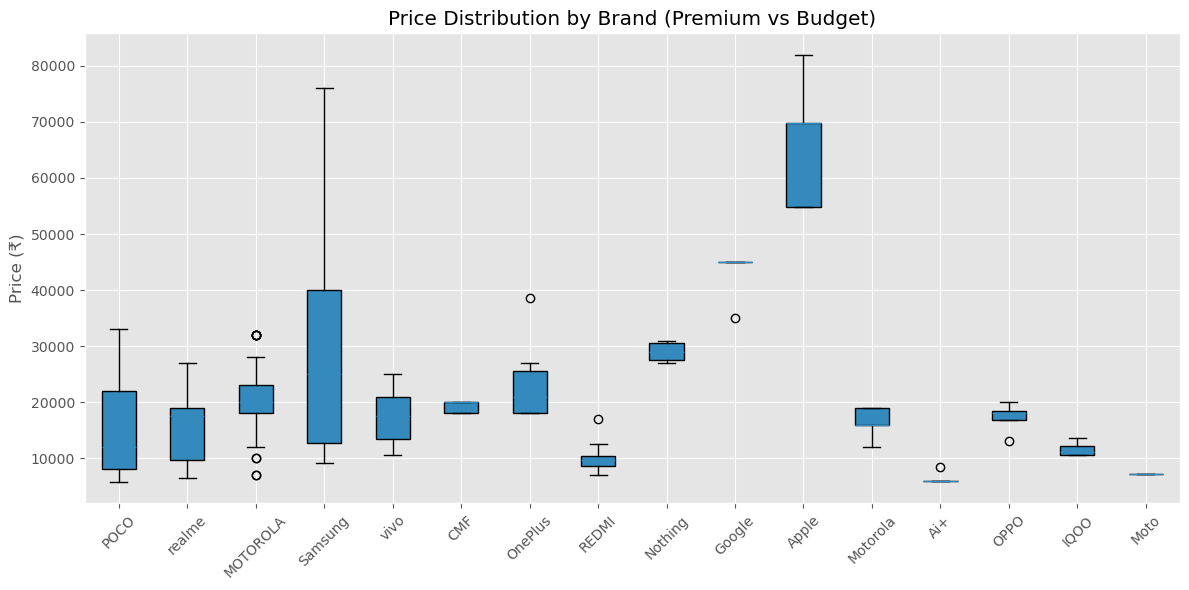

In [11]:
# --- BRAND ANALYSIS ---

# 1. Aggregation Table
brand_analysis = df.groupby('Brand').agg(
    Avg_Price=('Original Price', 'mean'),
    Avg_Rating=('Rating', 'mean'),
    Phone_Count=('Model', 'count')
).reset_index()

brand_analysis['Avg_Price'] = brand_analysis['Avg_Price'].round(0).astype(int)
brand_analysis['Avg_Rating'] = brand_analysis['Avg_Rating'].round(2)

print("Top 5 Brands by Price:")
display(brand_analysis.sort_values('Avg_Price', ascending=False).head())

# 2. Visual: Price Distribution
# Filter brands with 3+ phones for cleaner plot
brands_with_3plus = df['Brand'].value_counts()
valid_brands = brands_with_3plus[brands_with_3plus >= 3].index.tolist()
filtered_df = df[df['Brand'].isin(valid_brands)]

# Prepare data for matplotlib boxplot
plot_data = [filtered_df[filtered_df['Brand'] == b]['Original Price'].values for b in valid_brands]

plt.figure(figsize=(12, 6))

# FIXED LINE BELOW: Changed 'labels' to 'tick_labels'
plt.boxplot(plot_data, tick_labels=valid_brands, patch_artist=True)

plt.title('Price Distribution by Brand (Premium vs Budget)')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Visual: Average Rating

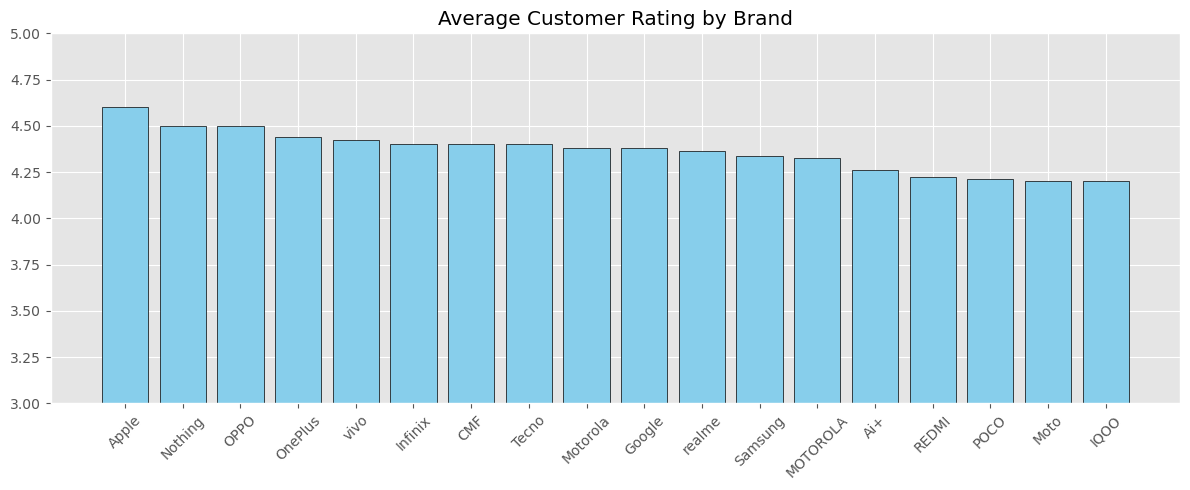

In [5]:
sorted_rating_brands = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False).index
rating_values = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False).values

plt.figure(figsize=(12, 5))
bars = plt.bar(sorted_rating_brands, rating_values, color='skyblue', edgecolor='black')
plt.title('Average Customer Rating by Brand')
plt.ylim(3.0, 5.0) # Zoom in to see differences
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Feature Analysis (5G & Storage)

5G Premium Price Gap: ₹-2,394


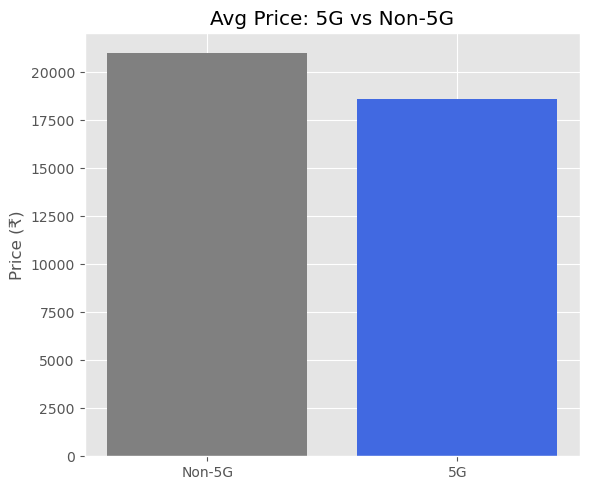

In [8]:
# 1. 5G Analysis
avg_price_5g = df[df['Is_5G']]['Original Price'].mean()
avg_price_non_5g = df[~df['Is_5G']]['Original Price'].mean()
gap = avg_price_5g - avg_price_non_5g

print(f"5G Premium Price Gap: ₹{gap:,.0f}")

plt.figure(figsize=(6, 5))
plt.bar(['Non-5G', '5G'], [avg_price_non_5g, avg_price_5g], color=['gray', 'royalblue'])
plt.title('Avg Price: 5G vs Non-5G')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.show()

##### Value for Money Analysis 

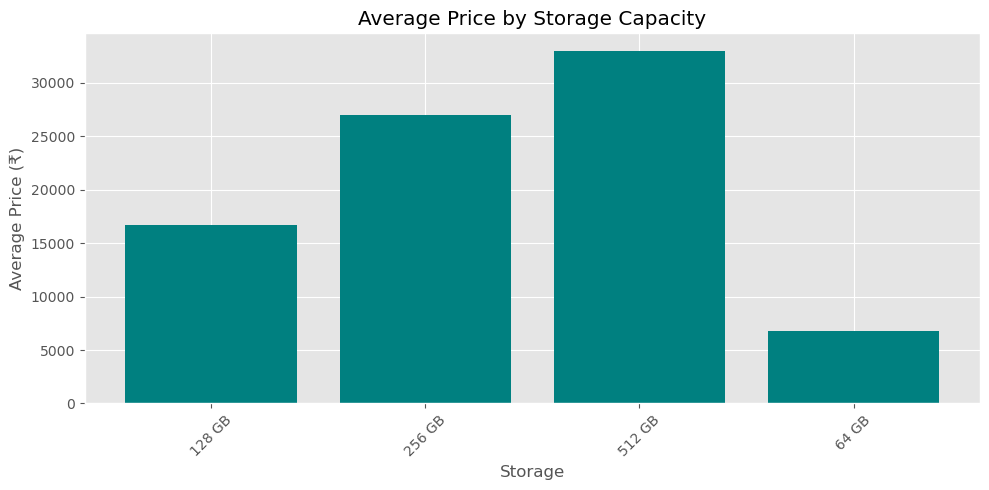

In [9]:
# 2. Storage Analysis
storage_price = df.groupby('Storage')['Original Price'].mean().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(storage_price.index.astype(str), storage_price.values, color='teal')
plt.title('Average Price by Storage Capacity')
plt.xlabel('Storage')
plt.ylabel('Average Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# BUYING RECOMMENDATIONS 

# Calculate Value Score
df['Value_Score'] = (df['Rating'] / df['Original Price']) * 10000
df['Value_Score'] = df['Value_Score'].round(2)

# Segmentation
budget_phones = df[df['Original Price'] <= 15000].copy()
mid_phones = df[(df['Original Price'] > 15000) & (df['Original Price'] <= 30000)].copy()
premium_phones = df[df['Original Price'] > 30000].copy()

# Find Winners
best_budget = budget_phones.sort_values('Value_Score', ascending=False).head(1)
best_mid = mid_phones.sort_values('Value_Score', ascending=False).head(1)

# Premium specific score (Rating / Log Price) to balance high costs
if not premium_phones.empty:
    premium_phones.loc[:, 'Premium_Score'] = (premium_phones['Rating'] / np.log10(premium_phones['Original Price']))
    best_premium = premium_phones.sort_values('Premium_Score', ascending=False).head(1)
else:
    best_premium = pd.DataFrame()

print("\n 🏆 BUYING RECOMMENDATIONS ")
if not best_budget.empty:
    print(f"💸 Best Budget (<15K): {best_budget.iloc[0]['Model']} — ₹{best_budget.iloc[0]['Original Price']:,.0f}")

if not best_mid.empty:
    print(f"📱 Best Mid-Range (15K-30K): {best_mid.iloc[0]['Model']} — ₹{best_mid.iloc[0]['Original Price']:,.0f}")

if not best_premium.empty:
    print(f"👑 Best Premium (>30K): {best_premium.iloc[0]['Model']} — Rating {best_premium.iloc[0]['Rating']}")


 🏆 BUYING RECOMMENDATIONS 
💸 Best Budget (<15K): Ai+ Pulse — ₹5,999
📱 Best Mid-Range (15K-30K): vivo T4x — ₹15,499
👑 Best Premium (>30K): Nothing Phone — Rating 4.5
